In [1]:
import numpy as np
import matplotlib.pyplot as plt

import random


from PIL import Image

from tensorflow.keras.losses import MSE

In [2]:
panda = Image.open("../datasets/panda.jpg")

In [3]:
small = panda.resize((100, 100))

In [4]:
image = np.array(small).mean(axis=2)

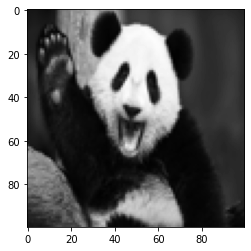

In [5]:
plt.imshow(image, cmap="gray")

In [6]:
original = image.flatten()

In [7]:
population = np.random.randint(0, 255, (1000, original.shape[0]))

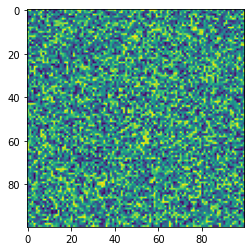

In [8]:
plt.imshow(population[0].reshape(*image.shape))

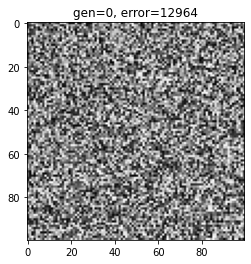

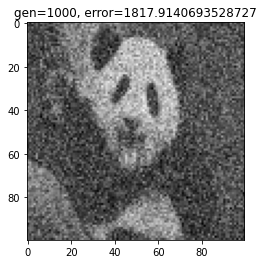

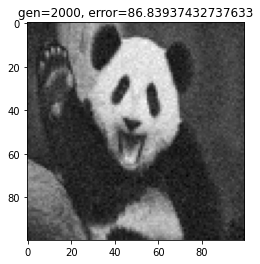

In [ ]:
for generation in range(3000):
    error = MSE(original, population).numpy()
    indices = error.argsort()
    fit = population[indices[:10]]

    first = fit[np.random.randint(0, 10, 1000)]
    second = fit[np.random.randint(0, 10, 1000)]
    data = np.stack([first, second], axis=2)

    first_selector = np.random.randint(0, 2, population.shape)
    second_selector = 1 - first_selector
    selector = np.stack([first_selector, second_selector], axis=2)


    mutation = np.random.randn(*population.shape)
    population = (data * selector).sum(axis=2) + mutation

    if generation % 1000 == 0:
        plt.figure()
        plt.title("gen={}, error={}".format(generation, error[indices[0]]))
        plt.imshow(population[0].reshape(*image.shape), cmap="gray")
        plt.show()